# ¿Qué es un laberinto?
Matemáticamente un laberinto se puede contemplar desde varios puntos: un laberinto puede ser visto como un grafo, un juego, o un escenario de búsqueda de caminos.

## Estructura de un laberinto

Un laberinto es un grafo no dirigido y cuyas aristas tienen un peso constante de 1. Las aristas representan las transiciones posibles, y los nodos los estados. Vamos a implementar una clase para definir un laberinto en Python. Nos apoyaremos en la librería Networkx para la manipulación de grafos, y de matplot para displayear el objeto.

In [1]:
import networkx as nx
import numpy as np 
import matplotlib.pyplot as plt    

In [2]:
class Maze:
    def __init__(self, N=5):
        self.N       = N
        self.end     = (N-1,N-1)
        self.start   = (0,0)
        self.player  = (0,0)
        self.bariers = []
        self.grid    = self.generate()

    def generate(self):
        while True:
            G = nx.grid_2d_graph(self.N, self.N)
            all_nodes = list(G.nodes())
            all_nodes.remove(self.start)
            all_nodes.remove(self.end)
            barriers = np.random.choice(range(len(all_nodes)), size=2*self.N, replace=False)
            barriers = [all_nodes[i] for i in barriers]
            G.remove_nodes_from(barriers)
            if nx.has_path(G, self.start, self.end):
                return G

    def display(self):
        pos     = {(x, y): (y, -x) for x, y in self.grid.nodes()}
        fig, ax = plt.subplots(figsize=(5, 5))
        nx.draw(self.grid, pos=pos, ax=ax, node_size=100, node_color='lightgray')
        nx.draw_networkx_nodes(self.grid, pos=pos, nodelist=[self.player], node_color='green', node_size=150, label='Jugador')
        nx.draw_networkx_nodes(self.grid, pos=pos, nodelist=[self.end], node_color='red', node_size=150, label='Meta')
        ax.legend()
        plt.grid(True)
        plt.axis('equal')
        plt.show()

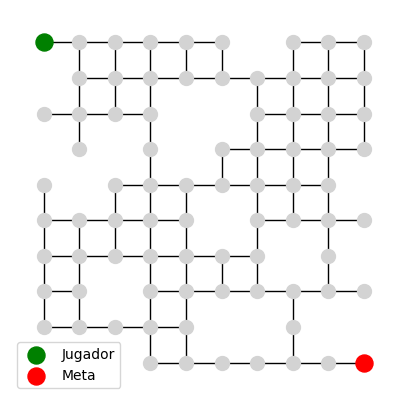

LABERINTO 0




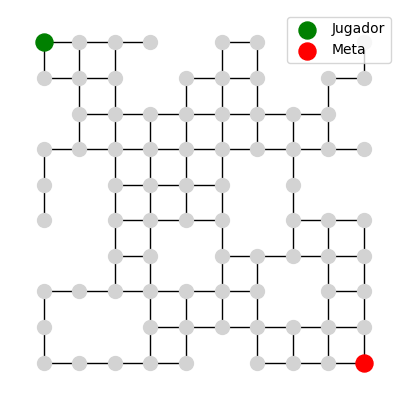

LABERINTO 1




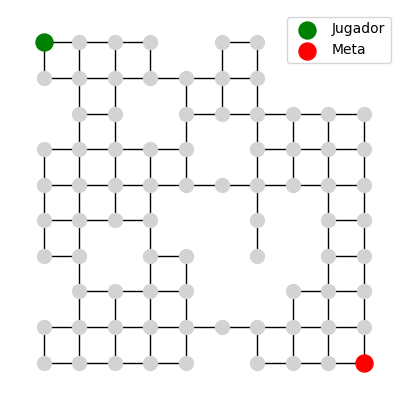

LABERINTO 2




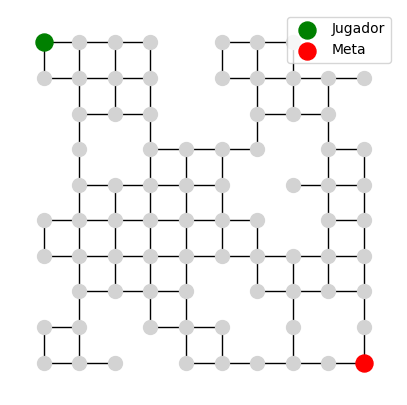

LABERINTO 3




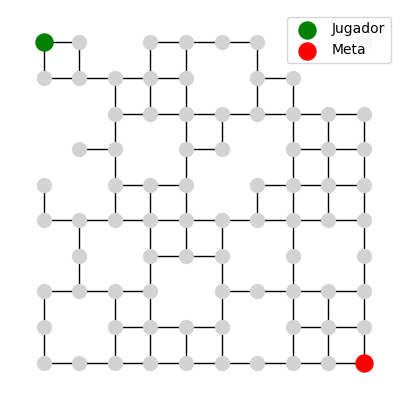

LABERINTO 4




In [3]:
for i in range(3):
    m = Maze(10)
    m.display()
    print(f"LABERINTO ALEATORIO {i}\n\n")

Resolver un laberinto consiste en encontrar un camino desde un punto del mismo hasta otro cualquiera bajo ciertas que restricciones. Restricciones que pueden incluir limitaciones en número de movimientos, en el tiempo para calcular la ruta, etc.. Para ello disponemos de varios métodos. Los más clasicos son los algoritmos de búsqueda en grafos, incluyendo Dijkstra y A*, y más recientemente otros con aplicación en juegos, como MonteCarlo Tree Search (usado con éxito por DeepMind en AlphaGo y AlphaStar)

[Algoritmos de búsqueda en grafos](https://es.wikipedia.org/wiki/Algoritmos_de_b%C3%BAsqueda_en_grafos)